# 神经网络

### 导入包

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.optim as optim
import pandas as pd
from my_tools import *

In [2]:
# 忽略warning
import warnings
warnings.filterwarnings("ignore")

### 读取数据

In [3]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

### 归一化

In [4]:
jibing = guiyihua(jibing)

### 标准化

In [5]:
jibing = biaozhunhua(jibing)

In [6]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,性别,年龄,高血压,高血脂,2型糖尿病,吸烟与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,1,1,4,1,0,-0.487123,0,0,1,0,...,1.623080,0.022580,-0.125125,0.627545,-0.390934,0.438800,0.135186,-0.836831,0.519737,2
1,1,0,4,0,0,0.256311,1,0,0,0,...,1.045433,-0.000756,-0.041179,0.510785,1.196191,0.182967,-0.101026,0.360809,0.498639,2
2,1,0,4,1,0,0.107624,0,0,0,0,...,-0.398685,-0.061430,-0.024931,-0.423288,1.592973,-0.883007,-0.101026,0.101860,1.279241,2
3,1,0,4,1,0,0.999745,1,0,1,0,...,0.178962,0.078587,-0.060135,-0.189770,0.138108,1.462135,0.084569,0.101860,-0.640618,3
4,1,0,4,0,0,0.256311,1,0,0,0,...,0.178962,-0.082432,-0.152204,-0.189770,0.138108,0.865190,-0.387855,0.506468,-1.241892,1


### 将 DataFrame 转换为 Tensor

In [7]:
jibing = torch.Tensor(jibing.values)
jibing_res = torch.Tensor(jibing_res.values)

In [8]:
jibing_res = jibing_res.long()

In [9]:
jibing_res

tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])

In [10]:
jibing_res[1]

tensor([0])

### 定义模型

In [11]:
# 模型（网络）
model = nn.Sequential(
    nn.Linear(62,100),
    nn.ReLU(),
    nn.Linear(100,100),
    nn.ReLU(),
    nn.Linear(100,50),
    nn.ReLU(),
    nn.Linear(50,2),
    nn.Softmax()
)

### 定义一个 epoch

In [12]:
def train(X,Y,model,batch_size,loss,optimizer):
    # 计算批次
    batch_num = int(X.shape[0]/batch_size)
    for step in range(batch_num):
        # 划分 batch
        X_batch=X[step*batch_size:(step+1)*batch_size]
        Y_batch=Y[step*batch_size:(step+1)*batch_size]

        # 计算预测值
        Y_hat = model(X_batch)
        # 计算loss
        l = loss(Y_hat,Y_batch.reshape(-1)).sum()
        # 梯度置为0
        optimizer.zero_grad()
        # 反向传播
        l.backward()
        # 梯度下降
        optimizer.step()

        accuracy = (Y_hat.argmax(axis=1)==Y_batch.reshape(-1)).sum()/Y_batch.shape[0]
    return (l,accuracy)

In [13]:
# 优化器，loss函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss = nn.CrossEntropyLoss()
# 保存 loss，accuracy
loss_s,accuracy_s=[],[]
epoch_num = 600
loss_s = []
accuracy_s = []
# 训练epochs
for i in range(epoch_num):
    loss_,accuracy_ = train(jibing,jibing_res,model,1000,loss,optimizer)
    if i % 10 == 0:
        loss_s.append(loss_)
        accuracy_s.append(accuracy_)

In [14]:
index = np.linspace(1,60,60)
loss_s[1].detach().numpy()

array(0.6819387, dtype=float32)

In [15]:
for i in range(len(loss_s)):
    loss_s[i] = loss_s[i].detach().numpy()
for i in range(len(accuracy_s)):
    accuracy_s[i] = accuracy_s[i].detach().numpy()

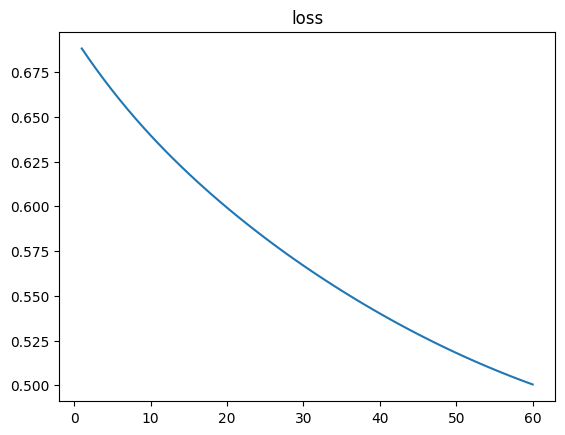

In [16]:
zhexiantu(index,loss_s,"loss")

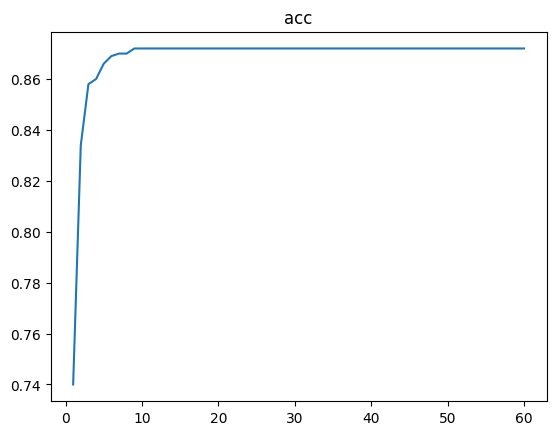

In [17]:
zhexiantu(index,accuracy_s,"acc")